In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [2]:
#read in all csv data files
fertility_df    = pd.read_csv("Resources/Fertility.csv")
gdp_df          = pd.read_csv("Resources/GDP per capita.csv")
life_expec_df   = pd.read_csv("Resources/Life expectancy.csv")
happiness_df    = pd.read_csv("Resources/Happiness.csv")
meat_df         = pd.read_csv("Resources/Meat consumption.csv")
median_age_df   = pd.read_csv("Resources/Median age.csv")
pop_growth_df   = pd.read_csv("Resources/Population growth.csv")
sex_df          = pd.read_csv("Resources/Sex-ratio.csv")
suicide_df      = pd.read_csv("Resources/Suicide rate.csv")
urban_df        = pd.read_csv("Resources/Urbanization rate.csv")

In [3]:
#happiness data comes from different source, look at column names
happiness_df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [4]:
#Rename columns
gdp_df.rename(columns={"GDP per capita":"GDP Per Capita"},              inplace=True)
happiness_df.rename(columns={"Country name":"Country"},                 inplace=True)
happiness_df.rename(columns={'Ladder score': "Happiness Score"},        inplace=True)
happiness_df.rename(columns={'Regional indicator': "Region"},           inplace=True)
life_expec_df.rename(columns={"Life expectancy":"Life Expectancy"},     inplace=True)
meat_df.rename(columns={"Meat consumption":"Meat Consumption"},         inplace=True)
median_age_df.rename(columns={"Median age":"Median Age"},               inplace=True)
pop_growth_df.rename(columns={"Population growth":"Population Growth"}, inplace=True)
sex_df.rename(columns={"Sex-ratio":"Sex Ratio"},                        inplace=True)
suicide_df.rename(columns={"Suicide rate":"Suicide Rate"},              inplace=True)
urban_df.rename(columns={"Urbanization rate":"Urbanization Rate"},      inplace=True)

In [5]:
#find any duplicate records in dataframes

# print("Fertility", len(fertility_df))
# print("GDP",       len(gdp_df))  
# print("LiftExp",   len(life_expec_df))
# print("Happiness", len(happiness_df))
# print("Meat",      len(meat_df))     
# print("Median",    len(median_age_df)) 
# print("PopGrowth", len(pop_growth_df)) 
print("Sex",       sex_df['Country'].value_counts())      
# print("Suicide",   len(suicide_df))  
# print("Urban",     len(urban_df)) 

Sex Guinea            2
Virgin Islands    2
Afghanistan       1
Panama            1
New Zealand       1
                 ..
Grenada           1
Guam              1
Guatemala         1
Guernsey          1
Zimbabwe          1
Name: Country, Length: 224, dtype: int64


In [6]:
#Only keep 1st duplicated record
gdp_df.drop_duplicates(subset=["Country","ISO-code"],        keep='first',inplace=True)
life_expec_df.drop_duplicates(subset=["Country","ISO-code"], keep='first',inplace=True)
meat_df.drop_duplicates(subset=["Country","ISO-code"],       keep='first',inplace=True)
median_age_df.drop_duplicates(subset=["Country","ISO-code"], keep='first',inplace=True)
pop_growth_df.drop_duplicates(subset=["Country","ISO-code"], keep='first',inplace=True)
sex_df.drop_duplicates(subset=["Country","ISO-code"],        keep='first',inplace=True)
suicide_df.drop_duplicates(subset=["Country","ISO-code"],    keep='first',inplace=True)
urban_df.drop_duplicates(subset=["Country","ISO-code"],      keep='first',inplace=True)
fertility_df.drop_duplicates(subset=["Country","ISO-code"],  keep='first',inplace=True)

In [7]:
#print lengths of all dataframes to find the one with the most records to be the basis of the join
print("Fertility", len(fertility_df))
print("GDP",       len(gdp_df))  
print("LiftExp",   len(life_expec_df))
print("Happiness", len(happiness_df))
print("Meat",      len(meat_df))     
print("Median",    len(median_age_df)) 
print("PopGrowth", len(pop_growth_df)) 
print("Sex",       len(sex_df))       
print("Suicide",   len(suicide_df))  
print("Urban",     len(urban_df)) 

Fertility 199
GDP 190
LiftExp 184
Happiness 153
Meat 186
Median 222
PopGrowth 206
Sex 224
Suicide 181
Urban 217


In [8]:
#merge data into one data frame--starting with all data from same source
merged_df = pd.merge(sex_df,fertility_df,  how="left",  on=["Country","ISO-code"])
merged_df = pd.merge(merged_df,gdp_df,  how="left", on=["Country","ISO-code"])
merged_df = pd.merge(merged_df,life_expec_df,  how="left", on=["Country","ISO-code"])
merged_df = pd.merge(merged_df,meat_df,  how="left", on=["Country", "ISO-code"])
merged_df = pd.merge(merged_df,median_age_df,  how="left", on=["Country","ISO-code"])
merged_df = pd.merge(merged_df,pop_growth_df,  how="left", on=["Country","ISO-code"])
merged_df = pd.merge(merged_df,suicide_df,  how="left", on=["Country","ISO-code"])
merged_df = pd.merge(merged_df,urban_df,  how="left", on=["Country","ISO-code"])

In [9]:
#add in happiness data
merged_df = pd.merge(merged_df,happiness_df,  how="left", on=["Country"])
merged_df.drop(columns=["Standard error of ladder score",
                         "upperwhisker", 
                         "lowerwhisker",
                         "Logged GDP per capita",
                         "Social support",
                         "Healthy life expectancy",
                         "Freedom to make life choices",
                         "Generosity",
                         "Perceptions of corruption",
                         "Ladder score in Dystopia",
                         "Explained by: Log GDP per capita",
                         "Explained by: Social support",
                         "Explained by: Healthy life expectancy",
                         "Explained by: Freedom to make life choices",
                         "Explained by: Generosity",
                         "Explained by: Perceptions of corruption",
                         "Dystopia + residual"],axis=1,inplace=True)

In [10]:
merged_df.head()

,Country,Sex Ratio,ISO-code,Fertility,GDP Per Capita,Life Expectancy,Meat Consumption,Median Age,Population Growth,Suicide Rate,Urbanization Rate,Region,Happiness Score
0,Afghanistan,1.03,AFG,4.5,2182.0,64.5,17.3,27.4,2.41,6.4,26.0,South Asia,2.5669
1,Albania,0.98,ALB,1.6,14866.0,NaN,NaN,32.9,0.26,5.6,62.1,Central and Eastern Europe,4.8827
2,Algeria,1.03,DZA,3.0,16091.0,76.7,18.3,28.1,1.89,3.3,73.7,Middle East and North Africa,5.0051
3,American Samoa,1.00,ASM,NaN,NaN,NaN,24.9,25.5,-0.26,NaN,87.2,NaN,NaN
4,Andorra,1.06,AND,1.3,NaN,81.8,NaN,44.3,0.63,NaN,87.9,NaN,NaN


In [11]:
#How many countries are listed, same as the number of rows of data
merged_df["Country"].count()

224

In [12]:
#check all numbers are integer/float types for plotting
merged_df.dtypes

Country               object
Sex Ratio            float64
ISO-code              object
Fertility            float64
GDP Per Capita       float64
Life Expectancy      float64
Meat Consumption     float64
Median Age           float64
Population Growth    float64
Suicide Rate         float64
Urbanization Rate    float64
Region                object
Happiness Score      float64
dtype: object

In [13]:
#check for any unusual min/max data points
merged_df.describe()

,Sex Ratio,Fertility,GDP Per Capita,Life Expectancy,Meat Consumption,Median Age,Population Growth,Suicide Rate,Urbanization Rate,Happiness Score
count,224.000000,199.000000,190.000000,183.000000,182.000000,221.000000,205.000000,181.000000,215.000000,143.000000
mean,1.006339,2.646834,22687.718421,72.215027,45.446703,30.833032,1.369171,9.731492,61.594419,5.491626
std,0.204154,1.227961,22687.027969,7.478398,34.959013,8.850380,1.267994,5.535447,23.898130,1.132267
min,0.830000,1.100000,314.500000,52.800000,3.000000,15.400000,-1.600000,0.400000,9.100000,2.566900
25%,0.950000,1.700000,5303.000000,67.000000,15.325000,23.100000,0.450000,5.800000,42.800000,4.726700
50%,0.985000,2.200000,14991.500000,73.400000,34.950000,30.300000,1.240000,9.100000,62.600000,5.541500
75%,1.010000,3.550000,33642.750000,77.250000,70.600000,38.700000,2.170000,12.800000,81.200000,6.243050
max,3.390000,6.100000,113352.000000,84.700000,145.900000,53.100000,9.130000,30.200000,100.000000,7.808700


In [14]:
#examine relationships between all metrics
merged_df.corr()

,Sex Ratio,Fertility,GDP Per Capita,Life Expectancy,Meat Consumption,Median Age,Population Growth,Suicide Rate,Urbanization Rate,Happiness Score
Sex Ratio,1.000000,-0.043403,0.175163,0.049815,0.116298,-0.045665,0.401431,-0.190586,0.128364,0.089650
Fertility,-0.043403,1.000000,-0.620067,-0.847344,-0.598771,-0.862931,0.624794,0.119895,-0.539265,-0.661711
GDP Per Capita,0.175163,-0.620067,1.000000,0.700664,0.714644,0.677047,-0.229931,-0.035751,0.629508,0.745166
Life Expectancy,0.049815,-0.847344,0.700664,1.000000,0.685394,0.823798,-0.521284,-0.287560,0.592238,0.771523
Meat Consumption,0.116298,-0.598771,0.714644,0.685394,1.000000,0.659112,-0.349692,-0.098811,0.534874,0.744284
Median Age,-0.045665,-0.862931,0.677047,0.823798,0.659112,1.000000,-0.665013,0.017984,0.492915,0.679637
Population Growth,0.401431,0.624794,-0.229931,-0.521284,-0.349692,-0.665013,1.000000,-0.138674,-0.252989,-0.462585
Suicide Rate,-0.190586,0.119895,-0.035751,-0.287560,-0.098811,0.017984,-0.138674,1.000000,-0.049334,-0.066812
Urbanization Rate,0.128364,-0.539265,0.629508,0.592238,0.534874,0.492915,-0.252989,-0.049334,1.000000,0.676126
Happiness Score,0.089650,-0.661711,0.745166,0.771523,0.744284,0.679637,-0.462585,-0.066812,0.676126,1.000000


In [15]:
#drop columns that we aren't using for analysis
merged_df_small = merged_df[["Country", 'ISO-code','Region', 'Fertility','GDP Per Capita','Life Expectancy','Meat Consumption','Urbanization Rate','Happiness Score']]
merged_df_small.head()                             

,Country,ISO-code,Region,Fertility,GDP Per Capita,Life Expectancy,Meat Consumption,Urbanization Rate,Happiness Score
0,Afghanistan,AFG,South Asia,4.5,2182.0,64.5,17.3,26.0,2.5669
1,Albania,ALB,Central and Eastern Europe,1.6,14866.0,NaN,NaN,62.1,4.8827
2,Algeria,DZA,Middle East and North Africa,3.0,16091.0,76.7,18.3,73.7,5.0051
3,American Samoa,ASM,NaN,NaN,NaN,NaN,24.9,87.2,NaN
4,Andorra,AND,NaN,1.3,NaN,81.8,NaN,87.9,NaN


In [16]:
#identify how much data is missing for each column, want to have full for meat consumption
print(merged_df_small.isna().sum())

Country               0
ISO-code              1
Region               81
Fertility            25
GDP Per Capita       34
Life Expectancy      41
Meat Consumption     42
Urbanization Rate     9
Happiness Score      81
dtype: int64


In [17]:
#dropping records that are nan for meat consumption
nan_records = merged_df_small.loc[merged_df_small["Meat Consumption"].isna()]
nan_record_list = list(nan_records["Country"])

noblanksmeat_df = merged_df_small.loc[~merged_df_small["Country"].isin(nan_record_list)]

print(noblanksmeat_df.isna().sum())

Country               0
ISO-code              0
Region               42
Fertility             5
GDP Per Capita        9
Life Expectancy      11
Meat Consumption      0
Urbanization Rate     4
Happiness Score      42
dtype: int64


In [18]:
print(f'The following {len(nan_record_list)} countires were removed from analysis for lack of data on Meat Consumption {nan_record_list}.')

The following 42 countires were removed from analysis for lack of data on Meat Consumption ['Albania', 'Andorra', 'Anguilla', 'Aruba', 'Bermuda', 'Brunei', 'Cayman Islands', 'Cook Islands', 'Curacao', 'Equatorial Guinea', 'Eswatini', 'Faroe Islands', 'Gaza Strip', 'Gibraltar', 'Guernsey', 'Hong Kong', 'Isle of Man', 'Jersey', 'Liechtenstein', 'Macau', 'Marshall Islands', 'Micronesia', 'Monaco', 'Montenegro', 'Montserrat', 'Nauru', 'Northern Mariana Islands', 'Palau', 'Puerto Rico', 'Saint Barthelemy', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Martin', 'Saint Pierre and Miquelon', 'San Marino', 'Serbia', 'Sint Maarten', 'Taiwan', 'Tonga', 'Turks and Caicos Islands', 'Tuvalu', 'Wallis and Futuna', 'Western Sahara'].


In [19]:
#meat consumption vs urbanization rate
urban_data_df = noblanksmeat_df[["Country", "Region", "Meat Consumption", "Urbanization Rate"]]

#which countries were dropped?
blank_urban = urban_data_df.loc[urban_data_df["Urbanization Rate"].isna()]
blank_urban_list = list(blank_urban["Country"])
print(f'The following {len(blank_urban_list)} countires were removed from analysis for lack of data on Urbanization rate {blank_urban_list}')

#drop urbanization rate values that are nan
urban_data_df_nona = urban_data_df.dropna(subset=["Urbanization Rate"])

The following 4 countires were removed from analysis for lack of data on Urbanization rate ['Kuwait', 'Samoa', 'Sao Tome and Principe', 'Virgin Islands']


In [20]:
#set meat consump. and urbanization columns to variables for plotting
meat_only = urban_data_df_nona["Meat Consumption"]
urban_only = urban_data_df_nona["Urbanization Rate"]

Text(0, 0.5, '% change in urbanization')

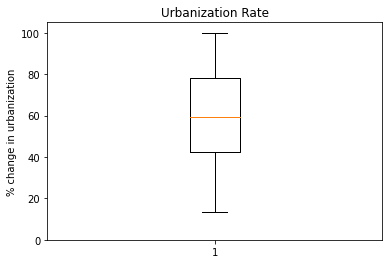

In [21]:
#show boxplot spread of urbanization rate data
plt.boxplot(urban_only)
plt.title("Urbanization Rate")
plt.ylim(0,105)
plt.ylabel("% change in urbanization")

In [22]:
#quartile calcuations for urbanization rate
quartiles = urban_only.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of urbanization rate is: {lowerq}")
print(f"The upper quartile of urbanization rate is: {upperq}")
print(f"The interquartile range of urbanization rate is: {iqr}")
print(f"The the median of urbanization rate is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of urbanization rate is: 42.425
The upper quartile of urbanization rate is: 78.25
The interquartile range of urbanization rate is: 35.825
The the median of urbanization rate is: 59.25 
Values below -11.312500000000007 could be outliers.
Values above 131.9875 could be outliers.


The r value is: 0.53487


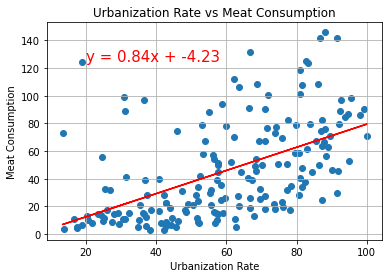

In [23]:
#scatter plot for meat vs urbanzation
plt.scatter(urban_only, meat_only)
plt.grid()
plt.xlabel("Urbanization Rate")
plt.ylabel("Meat Consumption")
plt.title("Urbanization Rate vs Meat Consumption")

(slope, intercept, rvalue, pvalue, stderr) = linregress(urban_only, meat_only)
regress_values = urban_only * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(urban_only,regress_values,"r-")
plt.annotate(line_eq,(20,125),fontsize=15,color="red")
print(f"The r value is: {round(rvalue, 5)}")

plt.savefig("Output/Urbanization_Meat_scatter.png")

In [24]:
#create list of countries without region data
blank_region = urban_data_df_nona.loc[urban_data_df_nona["Region"].isna()]
blank_region_list = list(blank_region["Country"])

#print which countries are excluded because there isn't a region listed
print(f'The following {len(blank_region_list)} countires were removed from analysis for lack of data for Region: {blank_region_list}')

The following 39 countires were removed from analysis for lack of data for Region: ['American Samoa', 'Angola', 'Antigua and Barbuda', 'The Bahamas', 'Barbados', 'Belize', 'Bhutan', 'Cape Verde', 'Democratic Republic of the Congo', 'Republic of the Congo', 'Cuba', 'Djibouti', 'Dominica', 'Eritrea', 'Fiji', 'French Polynesia', 'The Gambia', 'Greenland', 'Grenada', 'Guam', 'Guyana', 'Kiribati', 'North Korea', 'New Caledonia', 'North Macedonia', 'Oman', 'Papua New Guinea', 'Qatar', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Seychelles', 'Solomon Islands', 'Somalia', 'Sudan', 'Suriname', 'Syria', 'East Timor', 'Vanuatu']


In [56]:
#new df with null region values removed
region_noblanks = urban_data_df_nona.loc[~urban_data_df_nona["Country"].isin(blank_region_list)]

#new df grouped by region, means per region and sorted on meat consumption rate
regions_group = region_noblanks.groupby("Region")
regions_mean_df = regions_group.mean().sort_values(by="Meat Consumption")

In [53]:
#save df columns as variables for plotting
region_meat = regions_mean_df["Meat Consumption"]
region_urban = regions_mean_df["Urbanization Rate"]
region_list = regions_mean_df.index

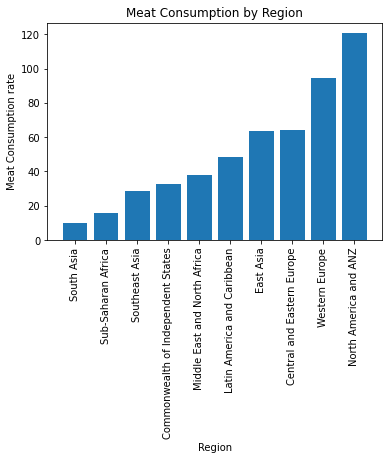

In [54]:
#plot regions vs meat
plt.bar(region_list, region_meat)
plt.xticks(rotation=90)
plt.xlabel("Region")
plt.ylabel("Meat Consumption rate")
plt.title("Meat Consumption by Region")

plt.savefig("Output/meat_byregion.png")

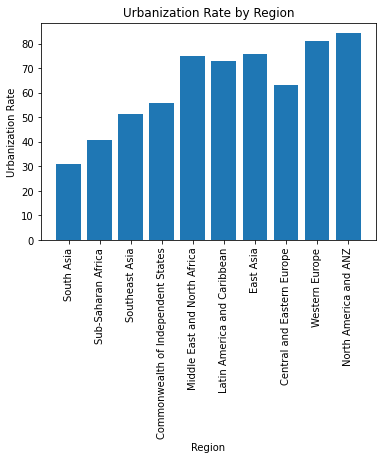

In [55]:
#plot regions vs urbanization
plt.bar(region_list, region_urban)
plt.xticks(rotation=90)
plt.xlabel("Region")
plt.ylabel("Urbanization Rate")
plt.title("Urbanization Rate by Region")

plt.savefig("Output/urban_byregion.png")

In [ ]:
#do a subplot figure--one plot for each metric, sorted by meat consumption, to compare trends?